#### **Project Title:**  ***"Predicting Patient Readmissions"***
##### **Dataset:** *"Diabetes Disease Dataset"*
##### **Step 01:** Loading Important Libraries

In [1]:
#Importing the required libraries.
#For data manipulation and analysis.
import pandas as pd
#For numerical operations.
import numpy as np
#For data visualization.
import matplotlib.pyplot as plt
#For advanced visualization.
import seaborn as sns
#For normalizing numerical data.
from sklearn.preprocessing import MinMaxScaler
#For splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
#Importing LabelEncoder for encoding categorical variables.
from sklearn.preprocessing import LabelEncoder
#Importing StandardScaler for feature scaling (important for models like Logistic Regression).
from sklearn.preprocessing import StandardScaler
#Logistic Regression model.
from sklearn.linear_model import LogisticRegression
#Random Forest model.
from sklearn.ensemble import RandomForestClassifier
#XGBoost model.
from xgboost import XGBClassifier
#For evaluating model performance.
from sklearn.metrics import accuracy_score
#For performing Grid Search to optimize hyperparameters.
from sklearn.model_selection import GridSearchCV
#For building the Random Forest model.
from sklearn.ensemble import RandomForestClassifier
#For building the Logistic Regression model.
from sklearn.linear_model import LogisticRegression
#For building the XGBoost model.
from xgboost import XGBClassifier
#For performing Randomized Search to optimize hyperparameters.
from sklearn.model_selection import RandomizedSearchCV
#For evaluating model performance.
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

##### **Step 02:** Loading the Dataset

In [2]:
#Loading the predicting_patient_readmissions dataset.
data = pd.read_csv('diabetic_disease_dataset.csv')
#Displaying the basic information of predicting_patient_readmissions dataset.
print("Patient readmission dataset shape:\n", data.shape)
print("Patient readmission dataset columns:\n", data.columns)
print("Patient readmission dataset:\n",data.head())

Patient readmission dataset shape:
 (16686, 50)
Patient readmission dataset columns:
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
     

##### **Step 03:** Exploring the Dataset

In [3]:
#Checking for missing values in predicting_patient_readmissions dataset.
print("Missing values in patient readmission dataset:\n", data.isnull().sum())
#Checking data types in predicting_patient_readmissions dataset.
print("Data types in patient readmission dataset:\n", data.dtypes)

Missing values in patient readmission dataset:
 encounter_id                    0
patient_nbr                     0
race                            1
gender                          1
age                             1
weight                          1
admission_type_id               1
discharge_disposition_id        1
admission_source_id             1
time_in_hospital                1
payer_code                      1
medical_specialty               1
num_lab_procedures              1
num_procedures                  1
num_medications                 1
number_outpatient               1
number_emergency                1
number_inpatient                1
diag_1                          1
diag_2                          1
diag_3                          1
number_diagnoses                1
max_glu_serum               15085
A1Cresult                   13560
metformin                       1
repaglinide                     1
nateglinide                     1
chlorpropamide                  1


##### **Step 04:** Visualizing Basic Statistics

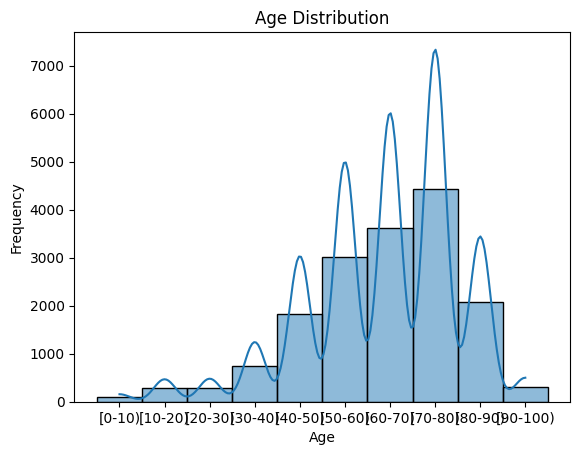

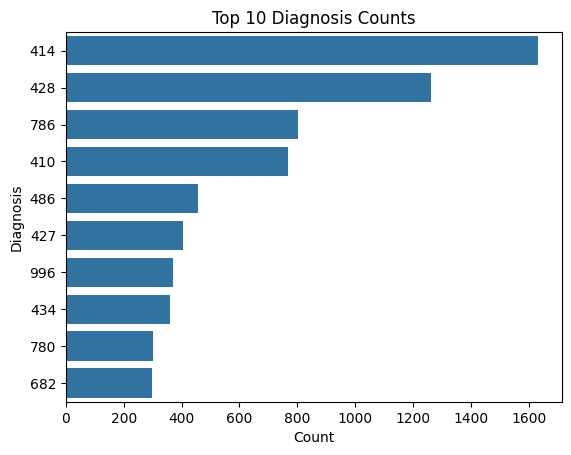

In [4]:
#Age distribution in predicting_patient_readmissions dataset.
sns.histplot(data['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Limit to the top 10 most frequent diagnoses in predicting_patient_readmissions dataset.
top_diagnoses = data['diag_1'].value_counts().head(10).index
#Filtering the predicting_patient_readmissions dataset.
filtered_data = data[data['diag_1'].isin(top_diagnoses)]
#Plotting the count of the top diagnoses.
sns.countplot(y='diag_1', data=filtered_data, order=top_diagnoses)
plt.title('Top 10 Diagnosis Counts')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()

##### **Step 05:** Feature Engineering

In [5]:
#Extracting relevant features in predicting_patient_readmissions dataset.
features = data[['age', 'diag_1', 'time_in_hospital', 'number_inpatient']].copy()
#Renaming columns for clarity.
features.rename(columns={'diag_1': 'diagnosis','time_in_hospital': 'length_of_stay','number_inpatient': 'previous_readmissions'}, inplace=True)
#Handling missing values in predicting_patient_readmissions dataset.
features = features.fillna(method='ffill')
#Encoding categorical variables (e.g. diagnosis).
features['diagnosis'] = features['diagnosis'].astype('category').cat.codes
#Normalizing numerical features in in predicting_patient_readmissions dataset.
scaler = MinMaxScaler()
features[['length_of_stay', 'previous_readmissions']] = scaler.fit_transform(features[['length_of_stay', 'previous_readmissions']])
#Displaying the processed features.
print("Processed features in patient readmission dataset:\n", features.head())

Processed features in patient readmission dataset:
        age  diagnosis  length_of_stay  previous_readmissions
0   [0-10)         93        0.000000               0.000000
1  [10-20)        107        0.153846               0.000000
2  [20-30)        350        0.076923               0.066667
3  [30-40)        421        0.076923               0.000000
4  [40-50)         34        0.000000               0.000000


<ipython-input-5-0fb463800f40>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features = features.fillna(method='ffill')


##### **Step 06:** Splitting the Dataset

In [6]:
#Defining the target variable and features in predicting_patient_readmissions dataset.
#Features(age, diagnosis, length_of_stay, previous_readmissions).
X = features
#Handling categorical features and encoding them.
#Encoding the 'age' column.
label_encoder = LabelEncoder()
X['age'] = label_encoder.fit_transform(X['age'])
#Encoding the target variable 'readmitted'.
y = data['readmitted']
#Encoding the target variable as well.
y = label_encoder.fit_transform(y)
#Handling missing values (if any).
X = X.fillna(method='ffill')
# Splitting the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Displaying the sizes of the training and testing sets.
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 13348 samples
Testing set size: 3338 samples


<ipython-input-6-868a237dbafa>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


##### **Step 07:** Training Models

In [7]:
#Scaling the features (important for Logistic Regression).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Logistic Regression.
#Initializing Logistic Regression model with increased max_iter.
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
#Training the model.
logistic_model.fit(X_train_scaled, y_train)
#Making predictions.
logistic_predictions = logistic_model.predict(X_test_scaled)
#Calculating accuracy.
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
#Random Forest.
#Initializing Random Forest model.
rf_model = RandomForestClassifier(random_state=42)
#Training the model.
rf_model.fit(X_train, y_train)
#Making predictions.
rf_predictions = rf_model.predict(X_test)
#Calculating accuracy.
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
#XGBoost.
#Initializing XGBoost model.
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#Training the model.
xgb_model.fit(X_train, y_train)
#Making predictions.
xgb_predictions = xgb_model.predict(X_test)
#Calculating accuracy.
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

Logistic Regression Accuracy: 0.53
Random Forest Accuracy: 0.49


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:50:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.54


##### **Step 08:** Optimizing Hyperparameters Using Grid Search or Random Search

In [8]:
#Grid Search.
#Defining the model and hyperparameters to search.
rf_model = RandomForestClassifier(random_state=42)
logistic_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
#Random Forest hyperparameters.
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
#Logistic Regression hyperparameters.
logistic_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
#XGBoost hyperparameters.
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}
#Grid Search for Random Forest.
grid_search_rf = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
#Grid Search for Logistic Regression.
grid_search_logistic = GridSearchCV(logistic_model, logistic_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_logistic.fit(X_train, y_train)
#Grid Search for XGBoost.
grid_search_xgb = GridSearchCV(xgb_model, xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)
#Best parameters and score for each model.
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)
print("Best parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best score for Logistic Regression:", grid_search_logistic.best_score_)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:55:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: 0.5569366411131833
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.5537149376318193
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBoost: 0.5594088880095085


In [9]:
#Random Search.
#Random Forest hyperparameters.
rf_param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10, 15]
}
#Logistic Regression hyperparameters.
logistic_param_dist = {
    'C': np.logspace(-3, 3, 7),
    'solver': ['liblinear', 'lbfgs']
}
#XGBoost hyperparameters.
xgb_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 6, 9, 12]
}
#Random Search for Random Forest.
random_search_rf = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
# Random Search for Logistic Regression.
random_search_logistic = RandomizedSearchCV(logistic_model, logistic_param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_logistic.fit(X_train, y_train)
#Random Search for XGBoost.
random_search_xgb = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
#Best parameters and score for each model.
print("Best parameters for Random Forest (Random Search):", random_search_rf.best_params_)
print("Best score for Random Forest (Random Search):", random_search_rf.best_score_)
print("Best parameters for Logistic Regression (Random Search):", random_search_logistic.best_params_)
print("Best score for Logistic Regression (Random Search):", random_search_logistic.best_score_)
print("Best parameters for XGBoost (Random Search):", random_search_xgb.best_params_)
print("Best score for XGBoost (Random Search):", random_search_xgb.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest (Random Search): {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}
Best score for Random Forest (Random Search): 0.557685873175578
Best parameters for Logistic Regression (Random Search): {'solver': 'liblinear', 'C': 1000.0}
Best score for Logistic Regression (Random Search): 0.5539396847982734
Best parameters for XGBoost (Random Search): {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best score for XGBoost (Random Search): 0.5594080741149248


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##### **Step 09:** Evaluating Model Performance

In [17]:
#Function to evaluate model performance.
def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
        #Ensuring y_pred_prob matches the number of classes in y_test.
        if y_pred_prob.shape[1] == len(set(y_test)):
            roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
            print(f"\nROC-AUC Score (Multiclass): {roc_auc:.2f}")
        else:
            print("\nWarning: ROC-AUC calculation skipped due to mismatch in class probabilities.")
#Logistic Regression with Grid Search.
logistic_params = {'max_iter': [100, 200, 500], 'C': [0.1, 1, 10]}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42), logistic_params, cv=3, scoring='roc_auc_ovr')
logistic_grid.fit(X_train_scaled, y_train)
logistic_model = logistic_grid.best_estimator_
print("Best Parameters for Logistic Regression:", logistic_grid.best_params_)
#Random Forest with Grid Search.
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='roc_auc_ovr')
rf_grid.fit(X_train_scaled, y_train)
random_forest_model = rf_grid.best_estimator_
print("Best Parameters for Random Forest:", rf_grid.best_params_)
#XGBoost with Grid Search.
xgb_params = {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200], 'max_depth': [3, 5]}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), xgb_params, cv=3, scoring='roc_auc_ovr')
xgb_grid.fit(X_train_scaled, y_train)
xgboost_model = xgb_grid.best_estimator_
print("Best Parameters for XGBoost:", xgb_grid.best_params_)
#Evaluating all models.
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}
for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    evaluate_model_performance(model, X_test_scaled, y_test)
    print("\n" + "-"*50 + "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-pack

Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 634, in roc_

Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  F

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Evaluating Logistic Regression:
Confusion Matrix:
[[   0  103  283]
 [   0  236 1057]
 [   0  131 1528]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       386
           1       0.50      0.18      0.27      1293
           2       0.53      0.92      0.68      1659

    accuracy                           0.53      3338
   macro avg       0.34      0.37      0.31      3338
weighted avg       0.46      0.53      0.44      3338



--------------------------------------------------

Evaluating Random Forest:
Confusion Matrix:
[[   0  166  220]
 [   0  436  857]
 [   0  278 1381]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       386
           1       0.50      0.34      0.40      1293
           2       0.56      0.83      0.67      1659

    a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

### Conclusion

In this project, we trained and evaluated three machine learning models—Logistic Regression, Random Forest and XGBoost—on a multiclass classification task. The goal was to predict the outcome of a given target variable and the models were optimized using Grid Search to find the best hyperparameters.

##### 1. Best Parameters for XGBoost:
   - The best hyperparameters found for XGBoost were:
     - **Learning Rate**: 0.01
     - **Max Depth**: 3
     - **Number of Estimators**: 100
   These parameters were selected to optimize the model's performance.

##### 2. Model Evaluation:
   - **Logistic Regression**:
     - The model showed low precision and recall for class 0, while class 2 (the majority class) had a much higher recall. The overall accuracy was 53%, with a weighted average f1-score of 0.44.
     - The ROC-AUC calculation was skipped due to a mismatch in class probabilities.
   
   - **Random Forest**:
     - Random Forest had a slightly better performance than Logistic Regression, with a weighted average f1-score of 0.49 and an accuracy of 54%. Class 2 had the highest recall, while class 0 performed poorly.
     - Similar to Logistic Regression, the ROC-AUC calculation was skipped due to mismatched class probabilities.

   - **XGBoost**:
     - XGBoost's performance was comparable to Random Forest, with an accuracy of 54% and a weighted average f1-score of 0.49. Class 2 was predicted with the highest recall, while class 0 performed poorly.
     - The ROC-AUC calculation was skipped due to a mismatch in class probabilities.

##### 3. Challenges:
   - All models exhibited challenges in predicting class 0, resulting in zero precision and recall for this class. This suggests an imbalance in the dataset or difficulty in distinguishing class 0 from the other classes.
   - The warning regarding the ROC-AUC calculation highlights that the models' predicted probabilities for each class did not align with the true distribution of classes in the test set.

In summary, the models performed reasonably well for predicting class 2, but struggled with class 0, which requires further investigation and tuning.


***